# Bipartite Graphs and Networkx

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from networkx.algorithms import bipartite

## Creating a bipartite graph from an existing graph
Below is cycle C6, which will be bipartite as all even-ordered cycles are. We work with it using networkx's bipartite algorithm class to find out more.

a: {0: 1, 1: 0, 5: 0, 4: 1, 3: 0, 2: 1}
graph is bipartite: True
sets of bipartite graph: ({0, 2, 4}, {1, 3, 5})
	top nodes: {0, 2, 4}
	bottom nodes: {1, 3, 5}


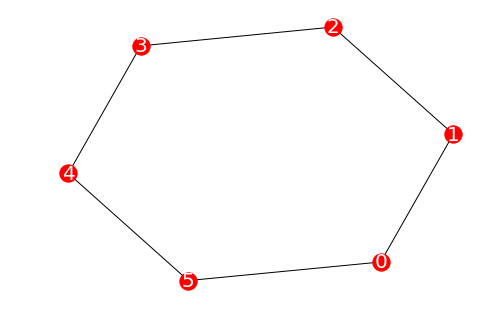

In [67]:
# cycle graph
c = nx.cycle_graph(6)

# draw graph
nx.draw(c, with_labels=True, font_size=20, font_color='white')

# top and bottom sets of nodes
top, bottom = nx.bipartite.sets(c)

print('a:',nx.bipartite.color(c))

print(f'graph is bipartite: {nx.is_bipartite(c)}')
print(f'sets of bipartite graph: {nx.bipartite.sets(c)}')
print(f'\ttop nodes: {top}')
print(f'\tbottom nodes: {bottom}')

# Creating a bipartite graph from two sets of nodes
Starting with two separate sets of nodes, we can construct a completer bipartite graph.

set C: {1, 3, 5}
set D: {0, 2, 4}


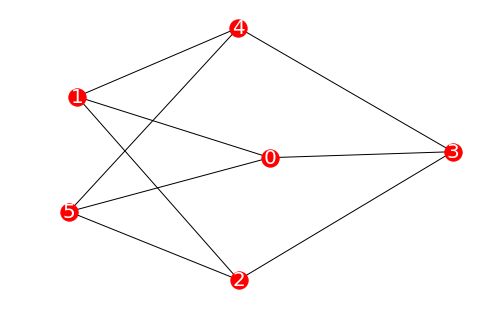

In [68]:
C = {i for i in range(6)} # set of 0-6

D = set(filter(lambda i: i % 2 == 0, C)) # set of even numbers in C

C -= D # remove even numbers from C

b = nx.complete_bipartite_graph(C,D)
print(f'set C: {C}')
print(f'set D: {D}')

# draw graph
nx.draw(b, with_labels=True, font_size=20, font_color='white')

# Random graph generation

In [70]:
import random

def randGraph(condition = lambda : random.randint(1,10) % 2 == 0, num_nodes = 10):
    G = nx.Graph()

    G.add_nodes_from([i for i in range(random.randint(1,num_nodes))])

    for i in G.nodes:
        for j in G.nodes:
            if condition:
                G.add_edges_from([(i,j)])
    
    return G

In [1]:
 # plot 5 randomly generated graphs

for i in range(5):
    plt.figure(i)
    nx.draw(randGraph(), with_labels=True, font_color='white') 

NameError: name 'plt' is not defined

# Finding a graph's chromatic number using the greedy algorithm

In [72]:
def chromaticNumber(graph):
    return len(set(nx.coloring.greedy_color(graph).values()))

In [73]:
# the chromatic number of wheel w6
print("CN(W6) =",chromaticNumber(nx.wheel_graph(6)))

# the chromatic number of complete graph k5
print("CN(K5) =",chromaticNumber(nx.complete_graph(5)))

# the chromatic number of star graph s9
print("CN(S9) =",chromaticNumber(nx.star_graph(9)))

# the chromatic number of cycle graph c7
print("CN(C7) =",chromaticNumber(nx.cycle_graph(7)))

CN(W6) = 4
CN(K5) = 5
CN(S9) = 2
CN(C7) = 3


graph is planar
graph is bipartite: False


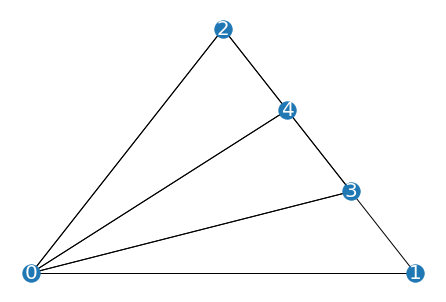

In [3]:
from networkx import planarity


# construct planar graph, no crossing edges
G = nx.PlanarEmbedding()
G.add_half_edge_cw(0, 1, None)
G.add_half_edge_cw(0, 2, 1)
G.add_half_edge_cw(0, 3, 2)
G.add_half_edge_cw(0, 4, 2)
G.add_half_edge_cw(1, 0, None)
G.add_half_edge_cw(2, 0, None)
G.add_half_edge_cw(2, 4, None)
G.add_half_edge_cw(3, 0, None)
G.add_half_edge_cw(3, 1, None)
G.add_half_edge_cw(3, 4, None)
G.add_half_edge_cw(4, 0, None)
G.add_half_edge_cw(4, 2, None)
G.add_half_edge_cw(4, 3, None)

#plot bipartite graph
try: 
    nx.draw_planar(G, with_labels=True, font_size=20, font_color='white')
    print('graph is planar')
except: 
    print('graph is not planar')

#check whether graph is bipartite
print(f'graph is bipartite: {nx.is_bipartite(G)}')
